# Exemple Chiffre d'affaire vente

Pour mener à bien notre exploration et manipulation de données, nous importerons les bibliothèques essentielles. Pandas nous permettra de manipuler les données de manière tabulaire, NumPy facilitera les calculs, tandis que Matplotlib et Seaborn nous aideront à créer des visualisations informatives incluant des courbes et des graphiques.

# 1. Importer les bibliothèques requises.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Chargement et visualisation des données 

Charger les données dans un DataFrame Pandas à partir du fichier "ventes.csv".

In [2]:
df= pd.read_csv("ventes.csv")
df

,Date,Produit,Catégorie,Prix HT
0,2016-01-01,Produit E,Électronique,363.17
1,2016-01-01,Produit E,Alimentation,6.53
2,2016-01-01,Produit A,Vêtements,450.17
3,2016-01-01,Produit E,Électronique,411.66
4,2016-01-01,Produit C,Vêtements,291.42
...,...,...,...,...
17780,2022-12-31,Produit D,Alimentation,53.52
17781,2022-12-31,Produit E,Beauté,162.05
17782,2022-12-31,Produit C,Beauté,251.75
17783,2022-12-31,Produit C,Beauté,346.10


Afficher un aperçu des premières lignes du jeu de données.

In [3]:
df.head()

,Date,Produit,Catégorie,Prix HT
0,2016-01-01,Produit E,Électronique,363.17
1,2016-01-01,Produit E,Alimentation,6.53
2,2016-01-01,Produit A,Vêtements,450.17
3,2016-01-01,Produit E,Électronique,411.66
4,2016-01-01,Produit C,Vêtements,291.42


Afficher la liste des produits

In [4]:
df["Produit"].unique()

array(['Produit E', 'Produit A', 'Produit C', 'Produit D', 'Produit B'],
      dtype=object)

Afficher la liste des catégories de produits

In [5]:
df["Catégorie"].unique()

array(['Électronique', 'Alimentation', 'Vêtements', 'Maison', 'Beauté'],
      dtype=object)

Convertir la première colonne "Date" en format date

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

Afficher le chiffre d'affaire par année de chaque article par un graphique en ligne

In [7]:
ca_article_annee = df.groupby([df['Date'].dt.year,"Produit"])["Prix HT"].sum().reset_index()
print(ca_article_annee)

    Date    Produit    Prix HT
0   2016  Produit A  136723.04
1   2016  Produit B  126183.23
2   2016  Produit C  129074.88
3   2016  Produit D  132038.58
4   2016  Produit E  125661.47
5   2017  Produit A  126483.05
6   2017  Produit B  133061.48
7   2017  Produit C  116033.53
8   2017  Produit D  134197.96
9   2017  Produit E  130823.81
10  2018  Produit A  124576.61
11  2018  Produit B  117979.20
12  2018  Produit C  133510.78
13  2018  Produit D  121827.06
14  2018  Produit E  126453.33
15  2019  Produit A  142449.89
16  2019  Produit B  120120.59
17  2019  Produit C  138741.69
18  2019  Produit D  126398.67
19  2019  Produit E  123960.98
20  2020  Produit A  128063.10
21  2020  Produit B  124667.32
22  2020  Produit C  132106.33
23  2020  Produit D  123919.59
24  2020  Produit E  122171.32
25  2021  Produit A  128060.61
26  2021  Produit B  136164.53
27  2021  Produit C  130768.64
28  2021  Produit D  117934.06
29  2021  Produit E  133891.24
30  2022  Produit A  126981.87
31  2022

<Figure size 1000x600 with 0 Axes>

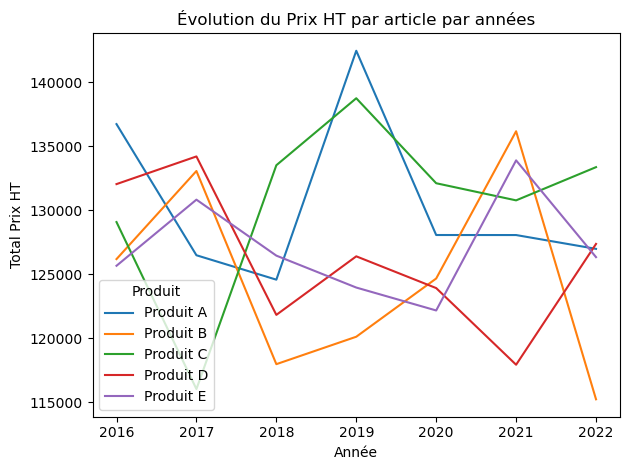

In [8]:
plt.figure(figsize=(10, 6))
pivot_df = ca_article_annee.pivot(index='Date', columns='Produit', values='Prix HT')
pivot_df.plot(kind='line')
plt.title("Évolution du Prix HT par article par années")
plt.xlabel("Année")
plt.ylabel("Total Prix HT")
plt.legend(title="Produit")
plt.tight_layout()

Afficher l'évolution du chiffre d'affaire total par années par un graphique en bar

Date
2016    649681.20
2017    640599.83
2018    624346.98
2019    651671.82
2020    630927.66
2021    646819.08
2022    629283.52
Name: Prix HT, dtype: float64


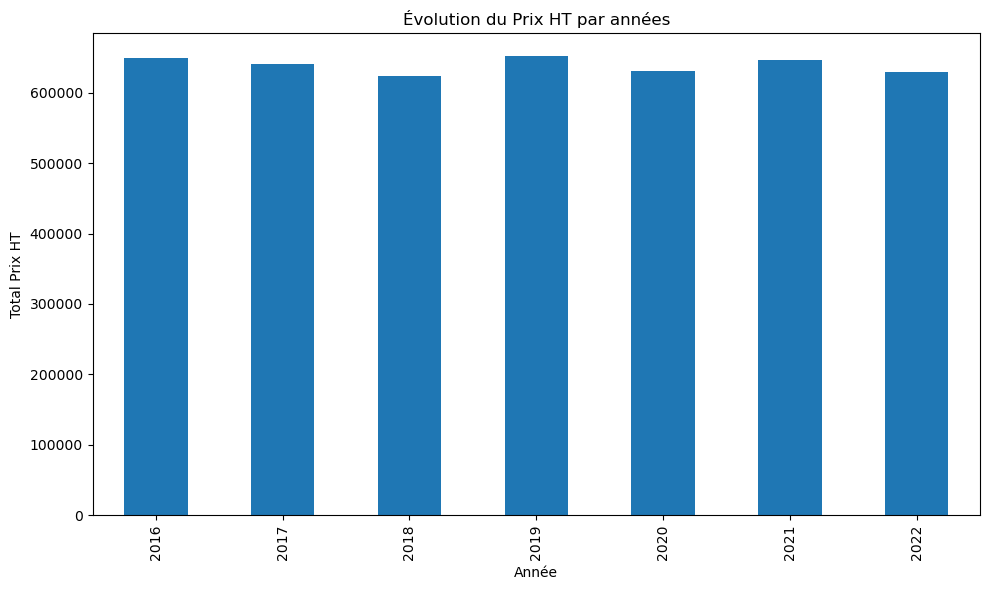

In [9]:
ca_par_annee= df.groupby(df["Date"].dt.year)["Prix HT"].sum()
print(ca_par_annee)

plt.figure(figsize=(10, 6))
ca_par_annee.plot(x="Date",y="Prix HT",kind='bar')
plt.title("Évolution du Prix HT par années")
plt.xlabel("Année")
plt.ylabel("Total Prix HT")
plt.tight_layout()